In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from IPython.display import clear_output

## function plot

In [2]:
def f_x(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 3*x+2

In [3]:
f_x(2)

11

In [2]:
def plotF(f):
    start=-5
    plotRange=10
    step=0.1
    N=plotRange/step
    t=np.arange(start,start+plotRange,step)
    y=f(t)
    plt.plot(t,y)

    

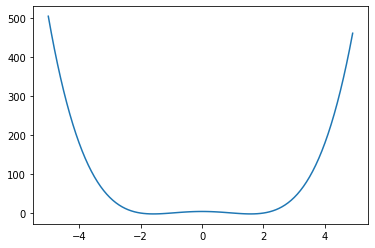

In [87]:
plotF(lambda x:(x+2)*(x+1)*(x-2)*(x-1))

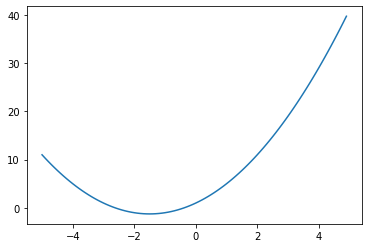

In [6]:
plotF(f_x)

## fixed step for GD

In [7]:
def f_x(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 2*x+3

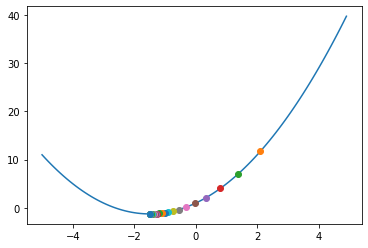

In [8]:
# draw
x=3
step=0
learning_rate=0.1
fig = plt.figure()
plotF(f_x)
plt.close()

while(step<50 and (abs(df_dx(x))>1e-6)) :
    x=x-learning_rate*df_dx(x)
    #print(x)
    #print(abs(f_x(x)))
    step+=1
    plt.figure()
    fm = plt.get_current_fig_manager()
    fm.canvas.figure = fig
    fig.canvas = fm.canvas
    #print('step: '+str(step))
    plt.plot(x,f_x(x),'o')
    plt.show()
    plt.close()
    clear_output(wait=True)

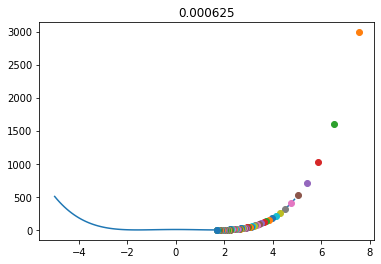

In [108]:
def f_x(x):
    return (x+2)*(x+1)*(x-2)*(x-1)

def df_dx(x):
    return 2*x*(2*pow(x,2)-5)

# draw
x=10
step=0
learning_rate=0.01
fig = plt.figure()
plotF(f_x)
plt.close()

while(step<150 and (abs(df_dx(x))>1e-6)) :
    x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
    # print(learning_rate)
    # # x=x-learning_rate*df_dx(x)
    # print(x)
    # print(abs(f_x(x)))
    step+=1
    plt.figure()
    fm = plt.get_current_fig_manager()
    fm.canvas.figure = fig
    fig.canvas = fm.canvas
    #print('step: '+str(step))
    plt.plot(x,f_x(x),'o')
    plt.title(learning_rate)
    plt.show()
    plt.close()
    clear_output(wait=True)


In [123]:
step
print(learning_rate)
print(x)
df_dx(x)

0.03125
1.5811388521702967


4.4172215028142027e-07

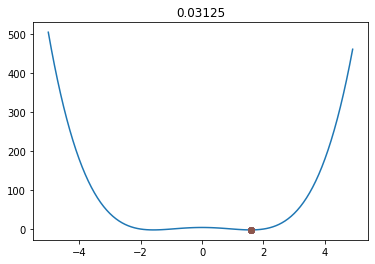

In [121]:
x=1.6448144882328974
learning_rate=
fig = plt.figure()
plotF(f_x)
plt.close()
step=0
while(step<200 and (abs(df_dx(x))>1e-6)) :
    x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
    # print(learning_rate)
    # # x=x-learning_rate*df_dx(x)
    # print(x)
    # print(abs(f_x(x)))
    step+=1
    plt.figure()
    fm = plt.get_current_fig_manager()
    fm.canvas.figure = fig
    fig.canvas = fm.canvas
    #print('step: '+str(step))
    plt.plot(x,f_x(x),'o')
    plt.title(learning_rate)
    plt.show()
    plt.close()
    clear_output(wait=True)

In [122]:
step

15

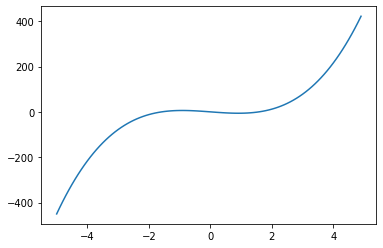

In [96]:
plotF(df_dx)

In [9]:
# property
x=3
step=0
learning_rate=0.1

while(step<500 and (abs(df_dx(x))>1e-6)) :
    x=x-learning_rate*df_dx(x)
    #print(x)
    if step%10==0:
        print(abs(f_x(x)))
        print(df_dx(x))
    step+=1
    # plt.figure()
    # fm = plt.get_current_fig_manager()
    # fm.canvas.figure = fig
    # fig.canvas = fm.canvas
    # #print('step: '+str(step))
    # plt.plot(x,f_x(x),'o')
    # plt.show()
    # plt.close()
    # clear_output(wait=True)
print(step)

11.71
7.2
1.1005813730029526
0.77309411328
1.248277320517463
0.08301034833169307
1.249980138857791
0.008913168282854933
1.2499997710166206
0.000957044156964848
1.2499999973600011
0.00010276183387469828
1.2499999999695626
1.1033967894480412e-05
1.2499999999996492
1.1847632812589382e-06
72


## back tracking line algorithm

In [3]:
def backtracking_line(f,df_dx,x,t,verbose=False):
    a=1/2
    b=1/2
    grad_f=df_dx(x)
    if verbose:
        print('g '+str(grad_f))
    while f(x-t*grad_f)>f(x)-a*t*grad_f*grad_f:
        t=b*t
    x=x-t*grad_f
    if verbose:
        print('t '+str(t))
        print('x '+str(x))
    return x,t

In [11]:
def f_x(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 2*x+3

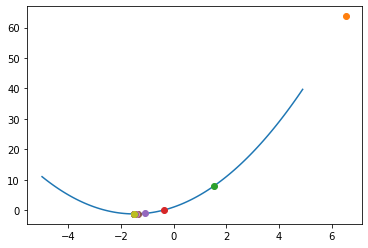

In [12]:
# draw

x=20
step=0
learning_rate=5
display=True
fig = plt.figure()
plotF(f_x)
plt.close()

while(step<50 and (abs(df_dx(x))>1e-6)) :
    #x=x-learning_rate*df_dx(x)
    x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
    #print(x)
    #print(abs(f_x(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        plt.plot(x,f_x(x),'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
#print(step)

## own work for optimal

### part 1 
update learning rate(step) when gradient is small

In [13]:
def backtracking_line(f,df_dx,x,t,verbose=False):

    '''
    a=1/2
    b=1/2
    grad_f=df_dx(x)
    while f(x-t*grad_f)>f(x)-a*t*grad_f*grad_f:
        t=b*t
    x=x-t*grad_f

    '''
    a=1/2
    b=1/2
    grad_f=df_dx(x)
    if verbose:
        print('g '+str(grad_f))
        print('sufficient '+str(f(x)-a*t*grad_f*grad_f))
    while f(x-t*grad_f)>f(x)-a*t*grad_f*grad_f:
        t=b*t
    x=x-t*grad_f
    if verbose:
        print('t '+str(t))
        print('x '+str(x))
    return x,t

In [14]:
def f(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 2*x+3
# property
x=10
step=0
learning_rate=5
display=False#True#
fig = plt.figure()
# plotF(f_x)
plt.close()
t=learning_rate
records=[]
while(step<50 and (abs(df_dx(x))>1e-6)) :
    #x=x-learning_rate*df_dx(x)
    #x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate,verbose=True)
    t=learning_rate
    a=1/2
    b=1/2
    grad_f=df_dx(x)
    suf=f(x)-a*t*grad_f*grad_f

    record=0
    while f(x-t*grad_f)>suf:
        record+=1
        #print(step)
        t=b*t
        suf=f(x)-a*t*grad_f*grad_f
    records.append(record)
    x=x-t*grad_f
    # print(x)
    # print((f_x(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        plt.plot(step,suf,'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
#print(step)

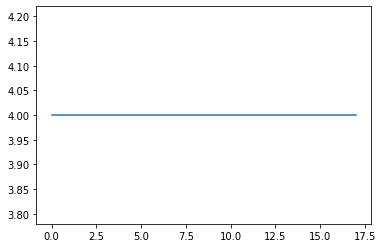

In [15]:
plt.plot(records)

In [51]:
# property
x=10
step=0
learning_rate=5
display=False
fig = plt.figure()
plotF(f_x)
plt.close()

while(step<50 and (abs(df_dx(x))>1e-6)) :
    #x=x-learning_rate*df_dx(x)
    if (abs(df_dx(x))>1e-3):
        x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
    else:
        learning_rate=0.5
        x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)

        # x=x-learning_rate*df_dx(x)
    print(x)
    print('l '+str(learning_rate))
    print(abs(f_x(x)))
    print(abs(df_dx(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        plt.plot(x,f_x(x),'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
    print('s '+str(step))

2.8125
l 0.3125
17.34765625
8.625
s 1
0.1171875
l 0.3125
1.36529541015625
3.234375
s 2
-0.8935546875
l 0.3125
0.8822240829467773
1.212890625
s 3
-1.2725830078125
l 0.3125
1.1982815116643906
0.454833984375
s 4
-1.4147186279296875
l 0.3125
1.242727087577805
0.170562744140625
s 5
-1.4680194854736328
l 0.3125
1.2489772466906288
0.06396102905273438
s 6
-1.4880073070526123
l 0.3125
1.2498561753158697
0.02398538589477539
s 7
-1.4955027401447296
l 0.3125
1.2499797746537942
0.008994519710540771
s 8
-1.4983135275542736
l 0.3125
1.2499971558106897
0.0033729448914527893
s 9
-1.4993675728328526
l 0.3125
1.2499996000358782
0.001264854334294796
s 10
-1.4997628398123197
l 0.3125
1.2499999437550455
0.0004743203753605485
s 11
-1.4998814199061599
l 0.25
1.2499999859387612
0.00023716018768027425
s 12
-1.5
l 0.5
1.25
0.0
s 13


In [41]:
np.arange(1,5,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

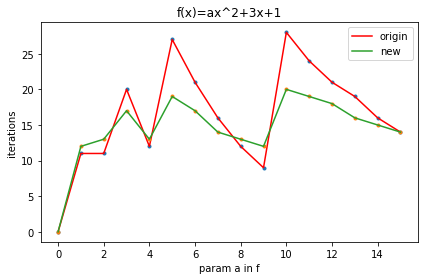

In [80]:
ratios=np.arange(1,20,0.51)
initial_rate=0.8
initial_x=8
N=15
# fig=plt.figure(figsize=(9,9))
origin_steps=np.zeros(N+1)
new_steps=np.zeros(N+1)
for i in range(1,N+1):
    
    def f_x(x):
        return i*pow(x,2)+x+1

    def df_dx(x):
        return i*2*x+1   
        
    # origin
    step=0
    x=initial_x
    learning_rate=initial_rate
    while(step<50 and (abs(df_dx(x))>1e-6)) :
        #x=x-learning_rate*df_dx(x)
        x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
        step+=1
    #print('origin step: '+str(step))
    origin_steps[i]=step
    # new
    step=0
    x=initial_x
    learning_rate=initial_rate
    while(step<50 and (abs(df_dx(x))>1e-6)) :
        #x=x-learning_rate*df_dx(x)
        if (abs(df_dx(x))>1e-2):
            x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
        else:
            learning_rate=1.5*learning_rate
            x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
        step+=1
    # print('new step: '+str(step))
    new_steps[i]=step
    #plt.subplot(8,2,a)
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.xlabel('param a in f')
plt.ylabel('iterations')
plt.title('f(x)=ax^2+3x+1')
plt.tight_layout()
plt.show()

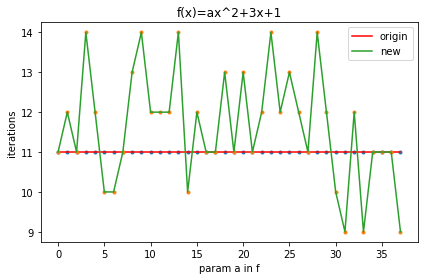

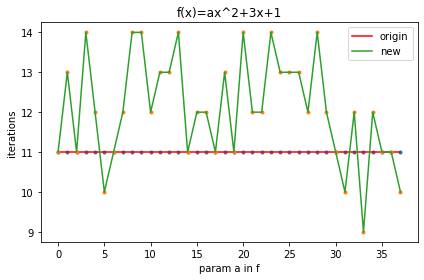

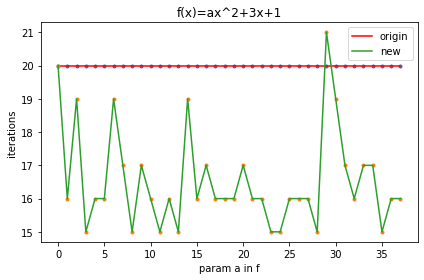

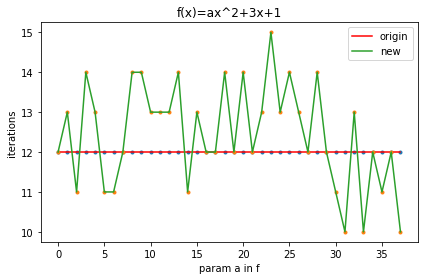

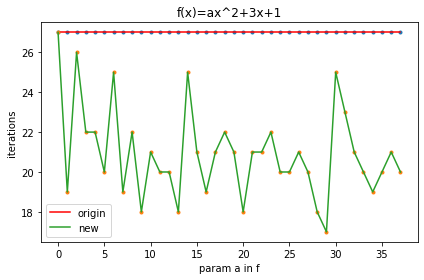

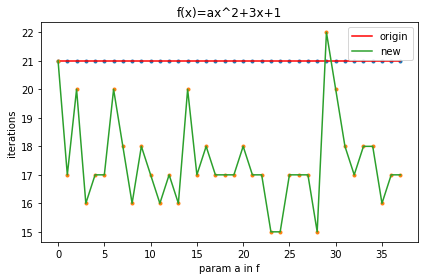

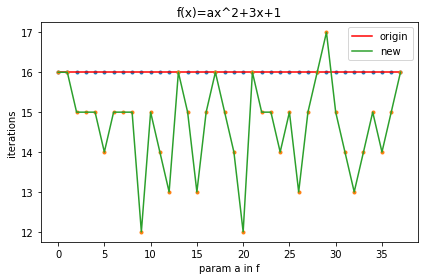

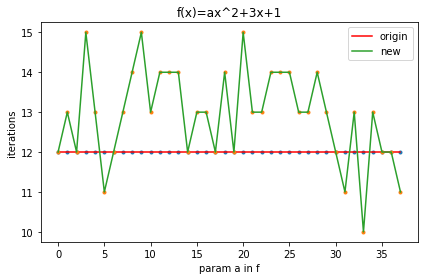

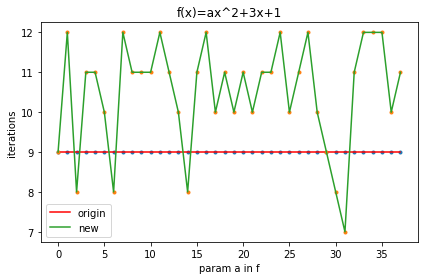

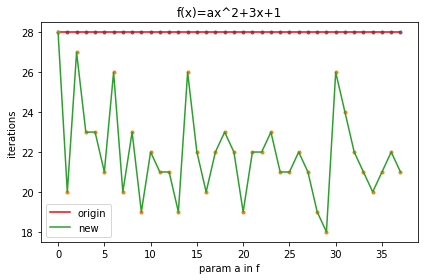

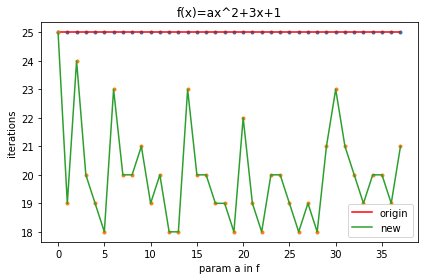

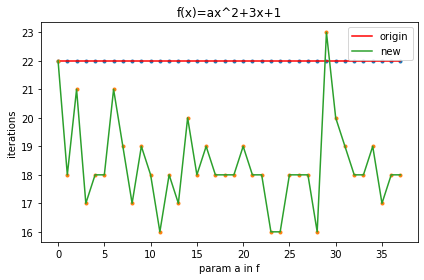

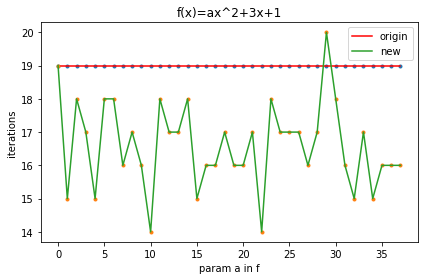

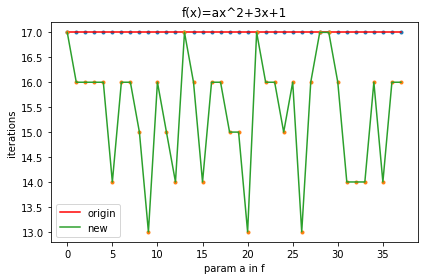

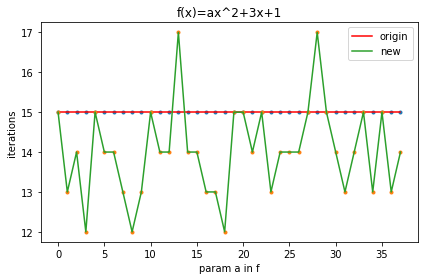

In [75]:
ratios=np.arange(1,20,0.51)
initial_rate=0.8
initial_x=10
N=15
# fig=plt.figure(figsize=(9,9))
for a in range(1,N+1):
    origin_steps=np.zeros(len(ratios))
    new_steps=np.zeros(len(ratios))
    def f_x(x):
        return a*pow(x,2)+x+1

    def df_dx(x):
        return a*2*x+1   
    for i in range(len(ratios)):
        
        # origin
        step=0
        x=initial_x
        learning_rate=initial_rate
        while(step<50 and (abs(df_dx(x))>1e-6)) :
            #x=x-learning_rate*df_dx(x)
            x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
            step+=1
        #print('origin step: '+str(step))
        origin_steps[i]=step
        # new
        step=0
        x=initial_x
        learning_rate=initial_rate
        while(step<50 and (abs(df_dx(x))>1e-6)) :
            #x=x-learning_rate*df_dx(x)
            if (abs(df_dx(x))>1e-2):
                x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
            else:
                learning_rate=ratios[i]*learning_rate
                x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
            step+=1
        # print('new step: '+str(step))
        new_steps[i]=step
    #plt.subplot(8,2,a)
    plt.plot(origin_steps,'.')
    plt.plot(origin_steps,'-',color='r',label='origin')
    plt.plot(new_steps,'.')
    plt.plot(new_steps,'-',label='new')
    plt.legend()
    plt.xlabel('param a in f')
    plt.ylabel('iterations')
    plt.title('f(x)=ax^2+3x+1')
    plt.tight_layout()
    plt.show()

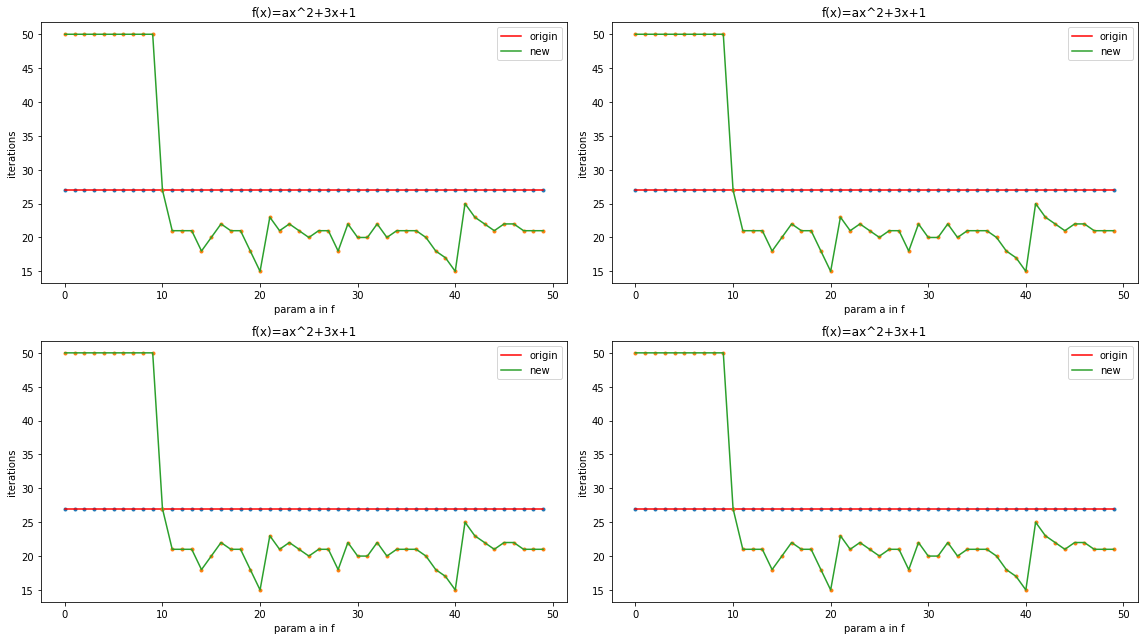

In [63]:
fig=plt.figure(figsize=(16,9))
plt.subplot(221)
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.xlabel('param a in f')
plt.ylabel('iterations')
plt.title('f(x)=ax^2+3x+1')

plt.subplot(222)
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.xlabel('param a in f')
plt.ylabel('iterations')
plt.title('f(x)=ax^2+3x+1')

plt.subplot(2,2,3)
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.xlabel('param a in f')
plt.ylabel('iterations')
plt.title('f(x)=ax^2+3x+1')

plt.subplot(224)
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.xlabel('param a in f')
plt.ylabel('iterations')
plt.title('f(x)=ax^2+3x+1')

plt.tight_layout()
plt.show()


In [31]:
print(np.mean(origin_steps))
print(np.mean(new_steps))
print(np.cov(origin_steps))
print(np.cov(new_steps))

17.84313725490196
16.254901960784313
55.81490196078431
22.993725490196084


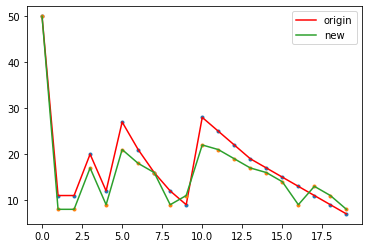

In [73]:
plt.plot(origin_steps,'.')
plt.plot(origin_steps,'-',color='r',label='origin')
plt.plot(new_steps,'.')
plt.plot(new_steps,'-',label='new')
plt.legend()
plt.show()

### part 2
skate

In [128]:
ratios=np.arange(1,20,0.51)
initial_rate=0.8
initial_x=8
N=20
# fig=plt.figure(figsize=(9,9))
origin_steps=np.zeros(N+1)
new_steps=np.zeros(N+1)
for i in range(1,N+1):
    
    def f_x(x):
        return i*pow(x,2)+x+1

    def df_dx(x):
        return i*2*x+1   
        
    # origin
    step=0
    x=initial_x
    learning_rate=initial_rate
    while(step<50 and (abs(df_dx(x))>1e-6)) :
        #x=x-learning_rate*df_dx(x)
        x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
        step+=1
    #print('origin step: '+str(step))
    origin_steps[i]=step
    # new
    step=0
    x=initial_x
    learning_rate=initial_rate
    while(step<50 and (abs(df_dx(x))>1e-6)) :
        #x=x-learning_rate*df_dx(x)
        if (abs(df_dx(x))>1e-2):
            x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
        else:
            learning_rate=1.5*learning_rate
            x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
        step+=1
    # print('new step: '+str(step))
    new_steps[i]=step
# plt.plot(origin_steps,'.')
# plt.plot(origin_steps,'-',color='r',label='origin')
# plt.plot(new_steps,'.')
# plt.plot(new_steps,'-',label='new')
# plt.legend()
# plt.xlabel('param a in f')
# plt.ylabel('iterations')
# plt.title('f(x)=ax^2+3x+1')
# plt.tight_layout()
# plt.show()

In [130]:
new_steps
origin_steps

array([ 0., 11., 11., 20., 12., 27., 21., 16., 12.,  9., 28., 24., 21.,
       19., 16., 14., 13., 11.,  9.,  7., 29.])

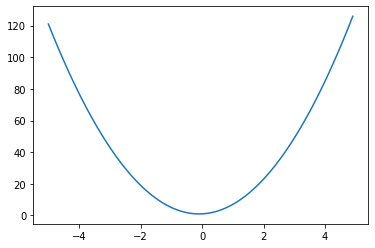

In [131]:
plotF(lambda x:5*pow(x,2)+x+1)

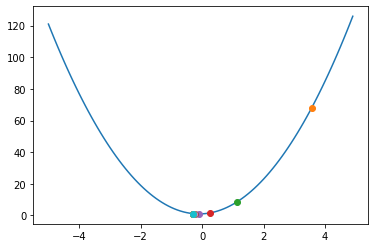

In [168]:
i=5
back=True
learning_rate=1
def f(x):
    return i*pow(x,2)+3*x+1

def df_dx(x):
    return i*2*x+3
# property
x=10
step=0


display=True#
fig = plt.figure()
plotF(f_x)
plt.close()
t=learning_rate
records=[]
while(step<50 and (abs(df_dx(x))>1e-6)) :
    if back is False:
        x=x-learning_rate*df_dx(x)
    #x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate,verbose=True)
    if back:
        t=learning_rate
        a=1/2
        b=1/2
        grad_f=df_dx(x)
        suf=f(x)-a*t*grad_f*grad_f

        record=0
        while f(x-t*grad_f)>suf:
            record+=1
            #print(step)
            t=b*t
            suf=f(x)-a*t*grad_f*grad_f
        records.append(record)
        x=x-t*grad_f
    # print(x)
    # print((f_x(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        #plt.plot(step,suf,'o')
        plt.plot(x,f_x(x),'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
#print(step)

In [169]:
print(x)
print(step)
print(learning_rate)

-0.2999999169324672
19
1


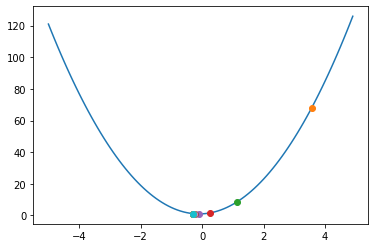

In [160]:
x=10#-0.2469161153646028
step=0
learning_rate=1
back=True
display=True#
fig = plt.figure()
plotF(f_x)
plt.close()
t=learning_rate
records=[]
while(step<50 and (abs(df_dx(x))>1e-6)) :
    if back is False:
        x=x-learning_rate*df_dx(x)
    #x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate,verbose=True)
    if back:
        t=learning_rate
        a=1/2
        b=1/2
        grad_f=df_dx(x)
        suf=f(x)-a*t*grad_f*grad_f

        record=0
        while f(x-t*grad_f)>suf:
            record+=1
            #print(step)
            t=b*t
            suf=f(x)-a*t*grad_f*grad_f
        records.append(record)
        x=x-t*grad_f
    # print(x)
    # print((f_x(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        #plt.plot(step,suf,'o')
        plt.plot(x,f_x(x),'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
#print(step)

In [161]:
print(x)
print(step)
print(t)
print(records)

-0.2999999169324672
19
0.0625
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [80]:
def backStep(f_x,df_dx,x=0,t=1,maxStep=50):
    '''
    Args:
    @f_x, function
    @df_dx, first order derivative of f_x
    @x, initial x
    @t, initial learing rate
    @maxStep, max iteration times
    '''
    step=0
    while(step<maxStep and (abs(df_dx(x))>1e-6)) :
        grad_f=df_dx(x)
        learning_rate=t
        x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)        
        step+=1
    return x,step

In [81]:
def skateStep(f_x,df_dx,x=0,t=1,threshold=1e-2,maxStep=50):
    '''
    Args:
    @f_x, function
    @df_dx, first order derivative of f_x
    @x, initial x
    @t, initial learing rate
    @threshold, transform to skate mode limit
    @maxStep, max iteration times
    '''
    skateMode=False
    finalMode=False
    step=0
    while(step<maxStep and (abs(df_dx(x))>1e-6)) :
        grad_f=df_dx(x)
        if skateMode==False:
            x,t=backtracking_line(f_x,df_dx,x,t)        
        if finalMode==False and skateMode==False and abs(grad_f)<threshold:
            skate=t*10
            skateMode=True
            minVal=f(x)
            minSite=x
            minVal2=f(x)
            minSite2=x
        if skateMode==True:
            # record min value and min site(and 2)
            x=x-skate*df_dx(x)
            # print('skate')
            # print(step)
            if f(x)<minVal:
                minVal=f(x)
                minSite=x
            else:
                # print('here')
                # return to last step
                x=minSite
                y=f_x(x)
                #x=(y/(minVal+y))*(minSite-x)+x
                finalMode=True
                skateMode=False
        if finalMode==True:
            x,t=backtracking_line(f_x,df_dx,x,t)
        step+=1
    return x,step

In [84]:
N=30
steps1=[]
steps2=[]
for i in range(1,N+1):
    def f_x(x):
        return i*pow(x,2)+3*x+1

    def df_dx(x):
        return i*2*x+3
    x1,step1=(backStep(f_x,df_dx,x=12,t=5,maxStep=50))
    x2,step2=(skateStep(f_x,df_dx,x=12,t=5,threshold=1,maxStep=50))
    steps1.append(step1)
    steps2.append(step2)

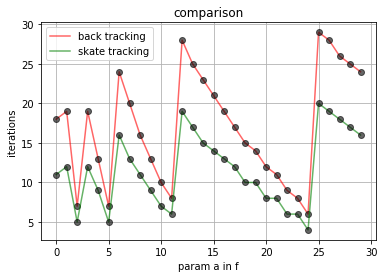

In [85]:
plt.plot(steps1,'r',alpha=0.6,label='back tracking')
plt.plot(steps1,'o',color='black',alpha=0.6)
plt.plot(steps2,'g',alpha=0.6,label='skate tracking')
plt.plot(steps2,'o',color='black',alpha=0.6)
plt.xlabel('param a in f')
plt.ylabel('iterations')
plt.title('f(x)=ax^2+3x+1')
plt.title('comparison')
plt.legend()
plt.grid()
plt.show()

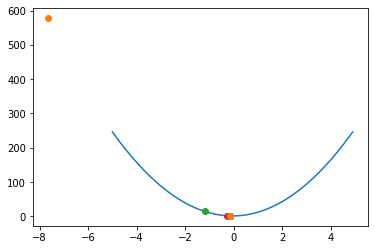

In [188]:
i=10
back=True
def f(x):
    return i*pow(x,2)+3*x+1

def df_dx(x):
    return i*2*x+3
# property
x=10
step=0
learning_rate=1
display=True#
fig = plt.figure()
plotF(f_x)
plt.close()
t=learning_rate
records=[]
skateMode=False
finalMode=False
threshold=1e-2
while(step<50 and (abs(df_dx(x))>1e-6)) :
    if back is False:
        x=x-learning_rate*df_dx(x)
    #x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate,verbose=True)
    if back:
        if skateMode==False:
            x,t=backtracking_line(f_x,df_dx,x,t)
            # a=1/2
            # b=1/2
            # grad_f=df_dx(x)
            # suf=f(x)-a*t*grad_f*grad_f

            # record=0
            # while f(x-t*grad_f)>suf:
            #     record+=1
            #     #print(step)
            #     t=b*t
            #     suf=f(x)-a*t*grad_f*grad_f
        
        if finalMode==False and skateMode==False and abs(grad_f)<threshold:
            skate=t*10
            print(skate)
            skateMode=True
            minVal=f(x)
            minSite=x
            minVal2=f(x)
            minSite2=x
        if skateMode==True:
            # record min value and min site(and 2)

            x=x-skate*df_dx(x)
            print(f(x))
            print(x)
            if f(x)<minVal:
                minVal=f(x)
                minSite=x
            else:
                print('here')
                finalMode=True
                skateMode=False
        if finalMode==True:
            x,t=backtracking_line(f_x,df_dx,x,t)
        # records.append(record)
        # x=x-t*grad_f
    # print(x)
    # print((f_x(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        #plt.plot(step,suf,'o')
        plt.plot(x,f_x(x),'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
#print(step)

In [190]:
print(step)
print(t)
print(skate)

11
0.03125
0.3125


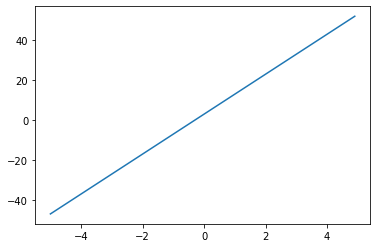

In [136]:
plotF(df_dx)

### part 3
chess strategy: look forward